## Exercise 10.1 (search)

We want to find the largest and smallest values in a long list of numbers. Implement
two algorithms, based on:

1. Iterating over the list entries; and 
1. First applying a built-in sort operation to the list.

Encapsulate each algorithm in a function. To create lists of numbers for testing use, for example:
```python
x = np.random.rand(1000)
```

### Solution

We first create the list of random numbers

In [1]:
import numpy as np
x = np.random.rand(1000)

#### Approach 1

In [2]:
def min_max1(x):
    x_min = x[0]
    x_max = x[0]
    for val in x:
        if val < x_min:
            x_min = val
        if val > x_max:
            x_max = val
    return x_min, x_max

print(min_max1(x))

(np.float64(0.004384363196785257), np.float64(0.9979673467963138))


#### Approach 2

In [3]:
def min_max2(x):
    xs = np.sort(x)
    return xs[0], xs[-1]

print(min_max2(x))


(np.float64(0.004384363196785257), np.float64(0.9979673467963138))


In [4]:
## test ##
assert min_max1(x) == min_max2(x)

In practice, we would use the the NumPy function:

In [10]:
print(np.min(x), np.max(x))

0.00083873715915872 0.9992079307400417


## Exercise 10.2 (Newton's method for root finding)

### Background

Newton's method can be used to find a root $x$ of a function $f(x)$ such that
$$
f(x) = 0
$$
A Taylor series expansion of $f$ about $x_{i}$ reads:
$$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} (x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$
If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:
\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}
In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.

### Task

Develop an implementation of Newton's method, with the following three functions in your implementation:
```python
def newton(f, df, x0, tol, max_it):
    # Implement here

    return x1  # return root
```
where `x0` is the initial guess, `tol` is the stopping tolerance, `max_it` is the maximum number 
of iterations, and 
```python
def f(x):
    # Evaluate function at x and return value


def df(x):
    # Evaluate df/dx at x and return value

```

Your implementation should raise an exception if the maximum number of iterations (`max_it`)
is exceeded.

Use your program to find the roots of:

$$
f(x) = \tan(x) - 2x
$$

between $-\pi/2$ and $\pi/2$. Plot $f(x)$ and $f^{\prime}(x)$ on the same graph, 
**and show all the roots** computed by Newton's method.

Newton's method can be sensitive to the starting value. Make sure you find the root around $x = 1.2$. 
What happens if you start at $x = 0.9$? It may help to add a print statement in the iteration loop, 
showing $x$ and $f$ at each iteration.


### Extension (optional)

For a complicated function we might not know how to compute the derivative, or it may be very complicated
to evaluate. Write a function that computes the *numerical derivative* of $f(x)$ by evaluating 
$(f(x + dx) - f(x - dx)) / (2dx)$, where $dx$ is small. How should you choose $dx$?

### Solution

We first implement a Newton solver function:

In [21]:
import numpy as np

def newton(f, df, x0, tol=1e-8, max_it=50, verbose = False):
    """Find root of equation defined by function f(x) where df(x) is
    first derivative and x is the initial guess.Optional arguments tol 
    (tolerance) and max_it (maximum number of iterations)"""
    
    x = x0
    for i in range(max_it):
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            raise ValueError("Derivative zero, method fails.")
        x_new = x - fx/dfx
        if verbose:
            print(f"Iteration {i+1}, x = {x_new}, f(x) = {f(x_new)}")
        if abs(f(x_new)) < tol:
            return x_new
        x = x_new
    raise RuntimeError("Maximum iterations exceeded")

We now provide implementations of `f` and `df`, and find the roots:

In [22]:
def f(x):
    return np.tan(x) - 2*x

def df(x):
    return 1/np.cos(x)**2 - 2

In [27]:
## tests ##

# Find roots near -1.2, 0.1, and 1.2
xroots = np.array((newton(f, df, -1.2),
                   newton(f, df, 0.1),
                   newton(f, df, 1.2)))
assert np.isclose(xroots, [-1.16556119e+00, 2.08575213e-10, 1.16556119e+00]).all()

Roots: [np.float64(-1.1655611852072116), np.float64(2.0857521309050608e-10), np.float64(1.1655611852072116)]


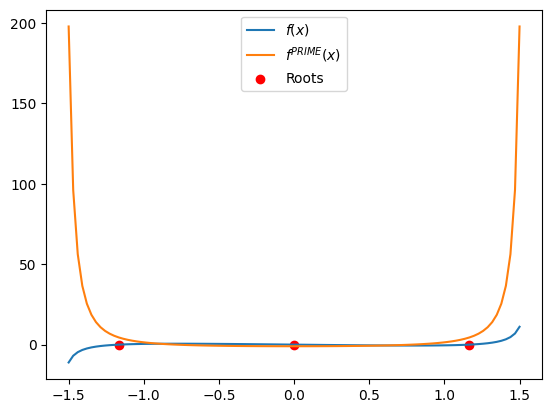

In [8]:
# We can visualise the result:
    
%matplotlib inline
import matplotlib.pyplot as plt

# Plot f and df/dx
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), label="$f^{PRIME}(x)$")

# Add location of roots to plot
# Find roots near -1.2, 0.1, and 1.2
roots = [
    newton(f, df, -1.2),
    newton(f, df, 0.1),
    newton(f, df, 1.2)
]
print("Roots:", roots)

plt.scatter(roots, [0,0,0], color="red", label="Roots")

plt.legend()
plt.show()

In [28]:
## with 1.2 as the starting guess, it coverges
newton(f, df, 1.2)

## but with 0.9, it doesn't converge in max iterations which is 50 
## and raises a RuntimeError
import pytest
with pytest.raises(RuntimeError):
    newton(f, df, 0.9, verbose = True)

Iteration 1, x = 1.818100247354237, f(x) = -7.597035324185395
Iteration 2, x = 2.3353201132969237, f(x) = -5.713285365321914
Iteration 3, x = 67.92318000583461, f(x) = -138.35777585328725
Iteration 4, x = 93.99295831088295, f(x) = -188.2464005559906
Iteration 5, x = -107.95606300324326, f(x) = 213.72523630465383
Iteration 6, x = -164.45996128904397, f(x) = 326.96896981589595
Iteration 7, x = -280.975899673535, f(x) = 556.9321542407995
Iteration 8, x = -303.99263340629875, f(x) = 608.9017618400151
Iteration 9, x = 3500.76674443716, f(x) = -6999.85866501183
Iteration 10, x = 7378.729653708574, f(x) = -14758.648221034215
Iteration 11, x = 43069.39916928521, f(x) = -86135.11809159383
Iteration 12, x = 49935.91882043606, f(x) = -99871.52436492336
Iteration 13, x = -60803.80344134833, f(x) = 121601.05998399788
Iteration 14, x = -63708.61929081817, f(x) = 127416.97055818529
Iteration 15, x = 73569.97463254974, f(x) = -147139.79006955953
Iteration 16, x = -77395.77359736562, f(x) = 154792.0974

For the extension, we can replace the function `df(x)` with a new version

In [ ]:
def df(x):
    # Try changing dx to 1e-15 or smaller
    dx = 1e-9
    ...

In [ ]:
## tests ##

# Find roots near -1.2, 0.1, and 1.2
xroots = np.array((newton(f, df, -1.2),
                   newton(f, df, 0.1),
                   newton(f, df, 1.2)))
assert np.isclose(xroots, [-1.16556119e+00, 2.08575213e-10, 1.16556119e+00]).all()

In [ ]:
# Plot f, f' and roots

...

In practice, we could use the Newton function `scipy.optimize.newton` from SciPy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) rather than implementing our own function.

## Exercise 10.3 (optional, low pass image filter)

Image files can be loaded as NumPy arrays displayed with Matplotlib. An imported colour image is stored as a 
three-dimensional NumPy array of floats. The shape of the array is `[0:nx, 0:ny, 0:3]`. 
where `nx` is the number of pixels in the $x$-direction, `ny` is the number of pixels in the $y$-direction,
and the third axis is for the colour component (RGB: red, green and blue) intensity.
For a greyscale image, for each pixel we have either an integer (typically in the range [0, 255]) or a float (in the range [0, 1.0]).

Below we fetch an image and display it:

In [ ]:
%matplotlib inline
import PIL
import urllib
import matplotlib.pyplot as plt

# Import image
url = 'https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/main/3.5.3/_images/stinkbug.png'
img = np.array(PIL.Image.open(urllib.request.urlopen(url)))

# Check type and shape
print(type(img))
print(f"Image array shape: {img.shape}")
print(f"Image pixel type: {img.dtype}")

# Convert pixel data from 8-bit integers [0, 255] to floats in range [0, 1]
img = np.float64(img) / 255

# Display image
plt.imshow(img);

The task is to write a *function* that applies a particular low-pass filter algorithm to an image array 
and  returns the  filtered image. With this particular filter, the value of a pixel in the filtered image 
is equal to the average value of the four neighbouring pixels in the original image. For the `[i, j, :]` pixel, 
the neighbours are  `[i, j+1, :]`, `[i, j-1, :]`, `[i+1, j, :]` and  `[i-1, j, :]`. 

Run the filter algorithm multiple times on the above image to explore the effect of the filter.

*Hint*: To create a NumPy array of zeros, `B`,  with the same shape as array `A`, use:
```python
import numpy as np
B = np.zeros_like(A)
```

In [ ]:
...